<a href="https://colab.research.google.com/github/Jcain17/Intro_to_ML/blob/main/ML_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [729]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))

varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binmap(x):
   return x.map({'yes': 1, 'no': 0})

housing[varlist] = housing[varlist].apply(binmap)
housing.head()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [730]:
varlist0 = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
housing0 = housing[varlist0]
housing0.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


In [731]:
np.random.seed(0)

train, valid = train_test_split(housing0, train_size = 0.8, test_size = 0.2, random_state = 100)

train.head()

,price,area,bedrooms,bathrooms,stories,parking
22,8645000,8050,3,1,1,1
41,7840000,6360,3,2,4,0
91,6419000,6750,2,1,1,2
118,5950000,6420,3,1,1,0
472,3010000,3630,4,1,2,3


In [732]:
price_train = train.pop('price')
X_train = train
X_train.head()

,area,bedrooms,bathrooms,stories,parking
22,8050,3,1,1,1
41,6360,3,2,4,0
91,6750,2,1,1,2
118,6420,3,1,1,0
472,3630,4,1,2,3


In [733]:
price_valid = valid.pop('price')
X_valid = valid
X_valid.head()

,area,bedrooms,bathrooms,stories,parking
265,2880,3,1,2,0
54,6000,3,2,2,1
171,10269,3,1,1,1
244,5320,3,1,2,0
268,4950,4,1,2,0


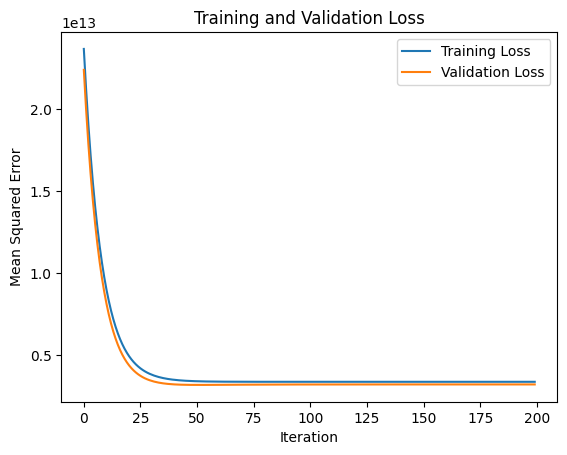

In [734]:
alpha = 0.000000001
theta = np.zeros(6)
iter = 200


X_a_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_a_valid = np.c_[np.ones((len(X_valid), 1)), X_valid]

def grad_des(X_train, Y_train, X_valid, Y_valid, theta, alpha, iter):
 train_losses = []
 val_losses = []
 m = len(X_train)

 for iteration in range(iter):
    gradients = 2/m * X_train.T.dot(X_train.dot(theta) - Y_train)
    theta -= alpha * gradients

    train_loss = (1/m) * np.sum(np.square(X_train.dot(theta) - Y_train))
    val_loss = (1/len(X_valid)) * np.sum(np.square(X_valid.dot(theta) - Y_valid))

    train_losses.append(train_loss)
    val_losses.append(val_loss)

 return train_losses,val_losses

train_loss, valid_loss = grad_des(X_a_train, price_train, X_a_valid, price_valid, theta, alpha, iter)

plt.plot(train_loss, label="Training Loss")
plt.plot(valid_loss, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()


In [735]:
varlist1 = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']

housing1 = housing[varlist1]
housing1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [736]:
train, valid = train_test_split(housing1, train_size = 0.8, test_size = 0.2, random_state = 100)

train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
22,8645000,8050,3,1,1,1,1,1,0,1,1,0
41,7840000,6360,3,2,4,1,0,0,0,1,0,1
91,6419000,6750,2,1,1,1,1,1,0,0,2,1
118,5950000,6420,3,1,1,1,0,1,0,1,0,1
472,3010000,3630,4,1,2,1,0,0,0,0,3,0


In [737]:
price_train = train.pop('price')
X_train = train
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
22,8050,3,1,1,1,1,1,0,1,1,0
41,6360,3,2,4,1,0,0,0,1,0,1
91,6750,2,1,1,1,1,1,0,0,2,1
118,6420,3,1,1,1,0,1,0,1,0,1
472,3630,4,1,2,1,0,0,0,0,3,0


In [738]:
price_valid = valid.pop('price')
X_valid = valid
X_valid.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
265,2880,3,1,2,1,0,0,0,0,0,1
54,6000,3,2,2,1,1,0,0,1,1,0
171,10269,3,1,1,1,0,0,0,0,1,1
244,5320,3,1,2,1,1,1,0,0,0,1
268,4950,4,1,2,1,0,0,0,1,0,0


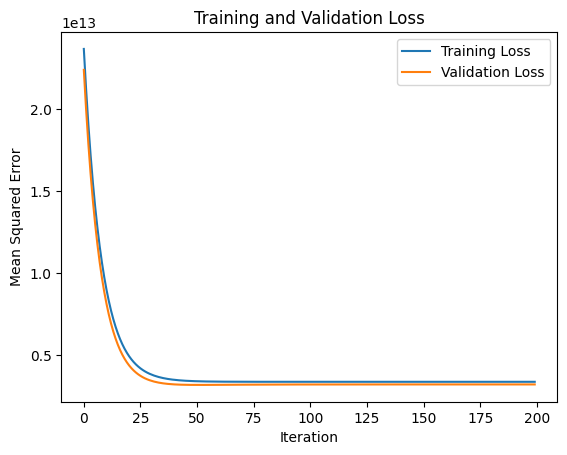

In [739]:
alpha = 0.000000001
theta = np.zeros(12)
iter = 200


X_a_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_a_valid = np.c_[np.ones((len(X_valid), 1)), X_valid]

train_loss, valid_loss = grad_des(X_a_train, price_train, X_a_valid, price_valid, theta, alpha, iter)

plt.plot(train_loss, label="Training Loss")
plt.plot(valid_loss, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

In [740]:
train_nom, valid_nom = train_test_split(housing0, train_size = 0.8, test_size = 0.2, random_state = 100)

scaler = MinMaxScaler()

train_nom[varlist0] = scaler.fit_transform(train_nom[varlist0])
train_nom.head()

,price,area,bedrooms,bathrooms,stories,parking
22,0.596970,0.432609,0.4,0.000000,0.000000,0.333333
41,0.527273,0.314954,0.4,0.333333,1.000000,0.000000
91,0.404242,0.342105,0.2,0.000000,0.000000,0.666667
118,0.363636,0.319131,0.4,0.000000,0.000000,0.000000
472,0.109091,0.124896,0.6,0.000000,0.333333,1.000000


In [741]:
price_train_nom = train_nom.pop('price')
X_train_nom = train_nom
X_train_nom.head()

,area,bedrooms,bathrooms,stories,parking
22,0.432609,0.4,0.000000,0.000000,0.333333
41,0.314954,0.4,0.333333,1.000000,0.000000
91,0.342105,0.2,0.000000,0.000000,0.666667
118,0.319131,0.4,0.000000,0.000000,0.000000
472,0.124896,0.6,0.000000,0.333333,1.000000


In [742]:
valid_nom[varlist0] = scaler.fit_transform(valid_nom[varlist0])
valid_nom.head()

,price,area,bedrooms,bathrooms,stories,parking
265,0.248485,0.088172,0.333333,0.0,0.333333,0.000000
54,0.531987,0.311828,0.333333,0.5,0.333333,0.333333
171,0.329966,0.617849,0.333333,0.0,0.000000,0.333333
244,0.262626,0.263082,0.333333,0.0,0.333333,0.000000
268,0.246465,0.236559,0.666667,0.0,0.333333,0.000000


In [743]:
price_valid_nom = valid_nom.pop('price')
X_valid_nom = valid_nom
X_valid_nom.head()

,area,bedrooms,bathrooms,stories,parking
265,0.088172,0.333333,0.0,0.333333,0.000000
54,0.311828,0.333333,0.5,0.333333,0.333333
171,0.617849,0.333333,0.0,0.000000,0.333333
244,0.263082,0.333333,0.0,0.333333,0.000000
268,0.236559,0.666667,0.0,0.333333,0.000000


In [744]:
train_std, valid_std = train_test_split(housing0, train_size = 0.8, test_size = 0.2, random_state = 100)

scaler = StandardScaler()

train_std[varlist0] = scaler.fit_transform(train_std[varlist0])
train_std.head()

,price,area,bedrooms,bathrooms,stories,parking
22,2.063847,1.351873,0.078679,-0.579897,-0.929023,0.311484
41,1.632233,0.565326,0.078679,1.410929,2.474792,-0.849261
91,0.870342,0.746837,-1.293483,-0.579897,-0.929023,1.472229
118,0.618880,0.593251,0.078679,-0.579897,-0.929023,-0.849261
472,-0.957447,-0.705249,1.450841,-0.579897,0.205582,2.632974


In [745]:
price_train_std = train_std.pop('price')
X_train_std = train_std
X_train_std.head()

,area,bedrooms,bathrooms,stories,parking
22,1.351873,0.078679,-0.579897,-0.929023,0.311484
41,0.565326,0.078679,1.410929,2.474792,-0.849261
91,0.746837,-1.293483,-0.579897,-0.929023,1.472229
118,0.593251,0.078679,-0.579897,-0.929023,-0.849261
472,-0.705249,1.450841,-0.579897,0.205582,2.632974


In [746]:
valid_std[varlist0] = scaler.fit_transform(valid_std[varlist0])
valid_std.head()

,price,area,bedrooms,bathrooms,stories,parking
265,-0.131863,-1.020953,-0.072023,-0.531775,0.308415,-0.643743
54,1.436782,0.369177,-0.072023,1.466964,0.308415,0.545545
171,0.318983,2.271249,-0.072023,-0.531775,-0.936669,0.545545
244,-0.053617,0.066200,-0.072023,-0.531775,0.308415,-0.643743
268,-0.143041,-0.098656,1.236396,-0.531775,0.308415,-0.643743


In [747]:
price_valid_std = valid_std.pop('price')
X_valid_std = valid_std
X_valid_std.head()

,area,bedrooms,bathrooms,stories,parking
265,-1.020953,-0.072023,-0.531775,0.308415,-0.643743
54,0.369177,-0.072023,1.466964,0.308415,0.545545
171,2.271249,-0.072023,-0.531775,-0.936669,0.545545
244,0.066200,-0.072023,-0.531775,0.308415,-0.643743
268,-0.098656,1.236396,-0.531775,0.308415,-0.643743


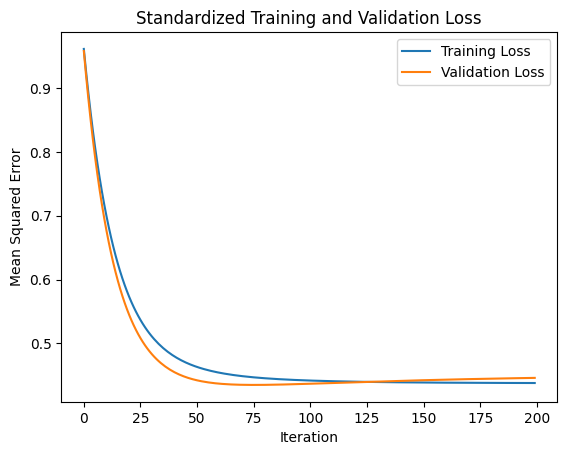

In [748]:
alpha = 0.01
theta = np.zeros(6)
iter = 200

X_a_train_std = np.c_[np.ones((len(X_train_std), 1)), X_train_std]
X_a_valid_std = np.c_[np.ones((len(X_valid_std), 1)), X_valid_std]

train_loss, valid_loss = grad_des(X_a_train_std, price_train_std, X_a_valid_std, price_valid_std, theta, alpha, iter)

plt.plot(train_loss, label="Training Loss")
plt.plot(valid_loss, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Standardized Training and Validation Loss")
plt.show()

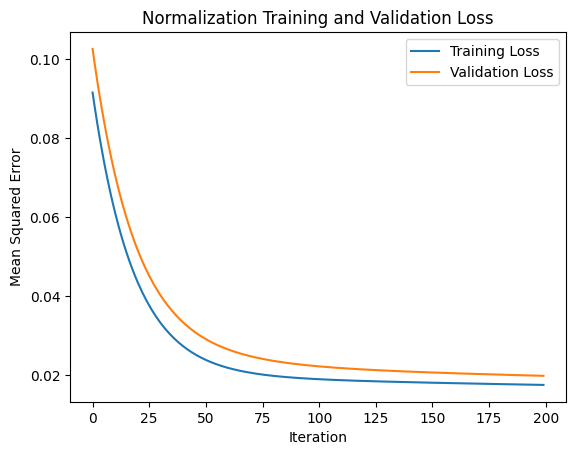

In [749]:
alpha = 0.01
theta = np.zeros(6)
iter = 200

X_a_train_nom = np.c_[np.ones((len(X_train_nom), 1)), X_train_nom]
X_a_valid_nom = np.c_[np.ones((len(X_valid_nom), 1)), X_valid_nom]

train_loss, valid_loss = grad_des(X_a_train_nom, price_train_nom, X_a_valid_nom, price_valid_nom, theta, alpha, iter)

plt.plot(train_loss, label="Training Loss")
plt.plot(valid_loss, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Normalization Training and Validation Loss")
plt.show()

In [750]:
train_nom, valid_nom = train_test_split(housing1, train_size = 0.8, test_size = 0.2, random_state = 100)

scaler = MinMaxScaler()

train_nom[varlist1] = scaler.fit_transform(train_nom[varlist1])
train_nom.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
22,0.596970,0.432609,0.4,0.000000,0.000000,1.0,1.0,1.0,0.0,1.0,0.333333,0.0
41,0.527273,0.314954,0.4,0.333333,1.000000,1.0,0.0,0.0,0.0,1.0,0.000000,1.0
91,0.404242,0.342105,0.2,0.000000,0.000000,1.0,1.0,1.0,0.0,0.0,0.666667,1.0
118,0.363636,0.319131,0.4,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,0.000000,1.0
472,0.109091,0.124896,0.6,0.000000,0.333333,1.0,0.0,0.0,0.0,0.0,1.000000,0.0


In [751]:
price_train_nom = train_nom.pop('price')
X_train_nom = train_nom
X_train_nom.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
22,0.432609,0.4,0.000000,0.000000,1.0,1.0,1.0,0.0,1.0,0.333333,0.0
41,0.314954,0.4,0.333333,1.000000,1.0,0.0,0.0,0.0,1.0,0.000000,1.0
91,0.342105,0.2,0.000000,0.000000,1.0,1.0,1.0,0.0,0.0,0.666667,1.0
118,0.319131,0.4,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,0.000000,1.0
472,0.124896,0.6,0.000000,0.333333,1.0,0.0,0.0,0.0,0.0,1.000000,0.0


In [752]:
valid_nom[varlist1] = scaler.fit_transform(valid_nom[varlist1])
valid_nom.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
265,0.248485,0.088172,0.333333,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,1.0
54,0.531987,0.311828,0.333333,0.5,0.333333,1.0,1.0,0.0,0.0,1.0,0.333333,0.0
171,0.329966,0.617849,0.333333,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.333333,1.0
244,0.262626,0.263082,0.333333,0.0,0.333333,1.0,1.0,1.0,0.0,0.0,0.000000,1.0
268,0.246465,0.236559,0.666667,0.0,0.333333,1.0,0.0,0.0,0.0,1.0,0.000000,0.0


In [753]:
price_valid_nom = valid_nom.pop('price')
X_valid_nom = valid_nom
X_valid_nom.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
265,0.088172,0.333333,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,1.0
54,0.311828,0.333333,0.5,0.333333,1.0,1.0,0.0,0.0,1.0,0.333333,0.0
171,0.617849,0.333333,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.333333,1.0
244,0.263082,0.333333,0.0,0.333333,1.0,1.0,1.0,0.0,0.0,0.000000,1.0
268,0.236559,0.666667,0.0,0.333333,1.0,0.0,0.0,0.0,1.0,0.000000,0.0


In [754]:
train_std, valid_std = train_test_split(housing1, train_size = 0.8, test_size = 0.2, random_state = 100)

scaler = StandardScaler()

train_std[varlist1] = scaler.fit_transform(train_std[varlist1])
train_std.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
22,2.063847,1.351873,0.078679,-0.579897,-0.929023,0.399468,2.193931,1.353207,-0.241355,1.525859,0.311484,-0.549083
41,1.632233,0.565326,0.078679,1.410929,2.474792,0.399468,-0.455803,-0.738985,-0.241355,1.525859,-0.849261,1.821217
91,0.870342,0.746837,-1.293483,-0.579897,-0.929023,0.399468,2.193931,1.353207,-0.241355,-0.655369,1.472229,1.821217
118,0.618880,0.593251,0.078679,-0.579897,-0.929023,0.399468,-0.455803,1.353207,-0.241355,1.525859,-0.849261,1.821217
472,-0.957447,-0.705249,1.450841,-0.579897,0.205582,0.399468,-0.455803,-0.738985,-0.241355,-0.655369,2.632974,-0.549083


In [755]:
price_train_std = train_std.pop('price')
X_train_std = train_std
X_train_std.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
22,1.351873,0.078679,-0.579897,-0.929023,0.399468,2.193931,1.353207,-0.241355,1.525859,0.311484,-0.549083
41,0.565326,0.078679,1.410929,2.474792,0.399468,-0.455803,-0.738985,-0.241355,1.525859,-0.849261,1.821217
91,0.746837,-1.293483,-0.579897,-0.929023,0.399468,2.193931,1.353207,-0.241355,-0.655369,1.472229,1.821217
118,0.593251,0.078679,-0.579897,-0.929023,0.399468,-0.455803,1.353207,-0.241355,1.525859,-0.849261,1.821217
472,-0.705249,1.450841,-0.579897,0.205582,0.399468,-0.455803,-0.738985,-0.241355,-0.655369,2.632974,-0.549083


In [756]:
valid_std[varlist1] = scaler.fit_transform(valid_std[varlist1])
valid_std.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
265,-0.131863,-1.020953,-0.072023,-0.531775,0.308415,0.429863,-0.502865,-0.716860,-0.096225,-0.776493,-0.643743,1.742710
54,1.436782,0.369177,-0.072023,1.466964,0.308415,0.429863,1.988604,-0.716860,-0.096225,1.287842,0.545545,-0.573819
171,0.318983,2.271249,-0.072023,-0.531775,-0.936669,0.429863,-0.502865,-0.716860,-0.096225,-0.776493,0.545545,1.742710
244,-0.053617,0.066200,-0.072023,-0.531775,0.308415,0.429863,1.988604,1.394972,-0.096225,-0.776493,-0.643743,1.742710
268,-0.143041,-0.098656,1.236396,-0.531775,0.308415,0.429863,-0.502865,-0.716860,-0.096225,1.287842,-0.643743,-0.573819


In [757]:
price_valid_std = valid_std.pop('price')
X_valid_std = valid_std
X_valid_std.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
265,-1.020953,-0.072023,-0.531775,0.308415,0.429863,-0.502865,-0.716860,-0.096225,-0.776493,-0.643743,1.742710
54,0.369177,-0.072023,1.466964,0.308415,0.429863,1.988604,-0.716860,-0.096225,1.287842,0.545545,-0.573819
171,2.271249,-0.072023,-0.531775,-0.936669,0.429863,-0.502865,-0.716860,-0.096225,-0.776493,0.545545,1.742710
244,0.066200,-0.072023,-0.531775,0.308415,0.429863,1.988604,1.394972,-0.096225,-0.776493,-0.643743,1.742710
268,-0.098656,1.236396,-0.531775,0.308415,0.429863,-0.502865,-0.716860,-0.096225,1.287842,-0.643743,-0.573819


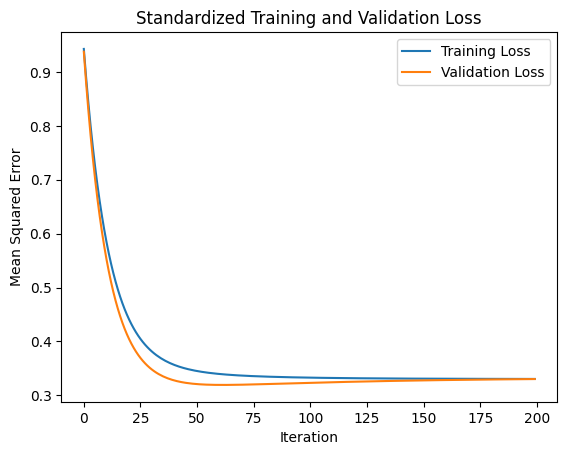

In [758]:
alpha = 0.01
theta = np.zeros(12)
iter = 200

X_a_train_std = np.c_[np.ones((len(X_train_std), 1)), X_train_std]
X_a_valid_std = np.c_[np.ones((len(X_valid_std), 1)), X_valid_std]

train_loss, valid_loss = grad_des(X_a_train_std, price_train_std, X_a_valid_std, price_valid_std, theta, alpha, iter)

plt.plot(train_loss, label="Training Loss")
plt.plot(valid_loss, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Standardized Training and Validation Loss")
plt.show()

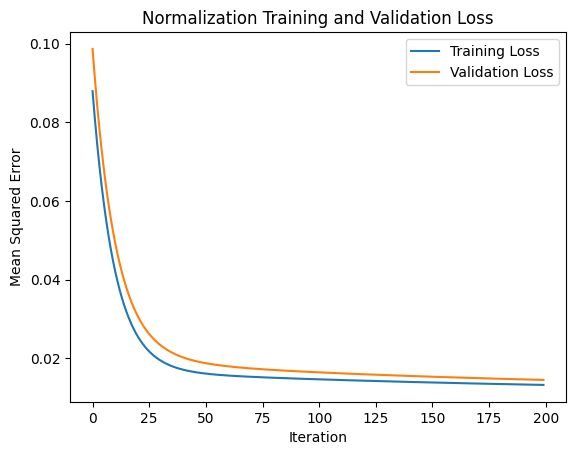

In [759]:
alpha = 0.01
theta = np.zeros(12)
iter = 200

X_a_train_nom = np.c_[np.ones((len(X_train_nom), 1)), X_train_nom]
X_a_valid_nom = np.c_[np.ones((len(X_valid_nom), 1)), X_valid_nom]

train_loss, valid_loss = grad_des(X_a_train_nom, price_train_nom, X_a_valid_nom, price_valid_nom, theta, alpha, iter)

plt.plot(train_loss, label="Training Loss")
plt.plot(valid_loss, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Normalization Training and Validation Loss")
plt.show()

In [760]:
def grad_des_a(X_train, Y_train, X_valid, Y_valid, theta, alpha, iter, lamda):
 train_losses = []
 val_losses = []
 m = len(X_train)

 for iteration in range(iter):
    gradients = 2/m * X_train.T.dot(X_train.dot(theta) - Y_train) + ((lamda/m) * theta)
    theta -= alpha * gradients

    train_loss = (1/m) * (np.sum(np.square(X_train.dot(theta) - Y_train)) + lamda * np.sum(np.square(theta)))
    val_loss = (1/len(X_valid)) * np.sum(np.square(X_valid.dot(theta) - Y_valid))

    train_losses.append(train_loss)
    val_losses.append(val_loss)

 return train_losses,val_losses

In [761]:
train_nom, valid_nom = train_test_split(housing0, train_size = 0.8, test_size = 0.2, random_state = 100)

scaler = MinMaxScaler()

train_nom[varlist0] = scaler.fit_transform(train_nom[varlist0])
train_nom.head()

,price,area,bedrooms,bathrooms,stories,parking
22,0.596970,0.432609,0.4,0.000000,0.000000,0.333333
41,0.527273,0.314954,0.4,0.333333,1.000000,0.000000
91,0.404242,0.342105,0.2,0.000000,0.000000,0.666667
118,0.363636,0.319131,0.4,0.000000,0.000000,0.000000
472,0.109091,0.124896,0.6,0.000000,0.333333,1.000000


In [762]:
price_train_nom = train_nom.pop('price')
X_train_nom = train_nom
X_train_nom.head()

,area,bedrooms,bathrooms,stories,parking
22,0.432609,0.4,0.000000,0.000000,0.333333
41,0.314954,0.4,0.333333,1.000000,0.000000
91,0.342105,0.2,0.000000,0.000000,0.666667
118,0.319131,0.4,0.000000,0.000000,0.000000
472,0.124896,0.6,0.000000,0.333333,1.000000


In [763]:
valid_nom[varlist0] = scaler.fit_transform(valid_nom[varlist0])
valid_nom.head()

,price,area,bedrooms,bathrooms,stories,parking
265,0.248485,0.088172,0.333333,0.0,0.333333,0.000000
54,0.531987,0.311828,0.333333,0.5,0.333333,0.333333
171,0.329966,0.617849,0.333333,0.0,0.000000,0.333333
244,0.262626,0.263082,0.333333,0.0,0.333333,0.000000
268,0.246465,0.236559,0.666667,0.0,0.333333,0.000000


In [764]:
price_valid_nom = valid_nom.pop('price')
X_valid_nom = valid_nom
X_valid_nom.head()

,area,bedrooms,bathrooms,stories,parking
265,0.088172,0.333333,0.0,0.333333,0.000000
54,0.311828,0.333333,0.5,0.333333,0.333333
171,0.617849,0.333333,0.0,0.000000,0.333333
244,0.263082,0.333333,0.0,0.333333,0.000000
268,0.236559,0.666667,0.0,0.333333,0.000000


In [765]:
train_std, valid_std = train_test_split(housing0, train_size = 0.8, test_size = 0.2, random_state = 100)

scaler = StandardScaler()

train_std[varlist0] = scaler.fit_transform(train_std[varlist0])
train_std.head()

,price,area,bedrooms,bathrooms,stories,parking
22,2.063847,1.351873,0.078679,-0.579897,-0.929023,0.311484
41,1.632233,0.565326,0.078679,1.410929,2.474792,-0.849261
91,0.870342,0.746837,-1.293483,-0.579897,-0.929023,1.472229
118,0.618880,0.593251,0.078679,-0.579897,-0.929023,-0.849261
472,-0.957447,-0.705249,1.450841,-0.579897,0.205582,2.632974


In [766]:
price_train_std = train_std.pop('price')
X_train_std = train_std
X_train_std.head()

,area,bedrooms,bathrooms,stories,parking
22,1.351873,0.078679,-0.579897,-0.929023,0.311484
41,0.565326,0.078679,1.410929,2.474792,-0.849261
91,0.746837,-1.293483,-0.579897,-0.929023,1.472229
118,0.593251,0.078679,-0.579897,-0.929023,-0.849261
472,-0.705249,1.450841,-0.579897,0.205582,2.632974


In [767]:
valid_std[varlist0] = scaler.fit_transform(valid_std[varlist0])
valid_std.head()

,price,area,bedrooms,bathrooms,stories,parking
265,-0.131863,-1.020953,-0.072023,-0.531775,0.308415,-0.643743
54,1.436782,0.369177,-0.072023,1.466964,0.308415,0.545545
171,0.318983,2.271249,-0.072023,-0.531775,-0.936669,0.545545
244,-0.053617,0.066200,-0.072023,-0.531775,0.308415,-0.643743
268,-0.143041,-0.098656,1.236396,-0.531775,0.308415,-0.643743


In [768]:
price_valid_std = valid_std.pop('price')
X_valid_std = valid_std
X_valid_std.head()

,area,bedrooms,bathrooms,stories,parking
265,-1.020953,-0.072023,-0.531775,0.308415,-0.643743
54,0.369177,-0.072023,1.466964,0.308415,0.545545
171,2.271249,-0.072023,-0.531775,-0.936669,0.545545
244,0.066200,-0.072023,-0.531775,0.308415,-0.643743
268,-0.098656,1.236396,-0.531775,0.308415,-0.643743


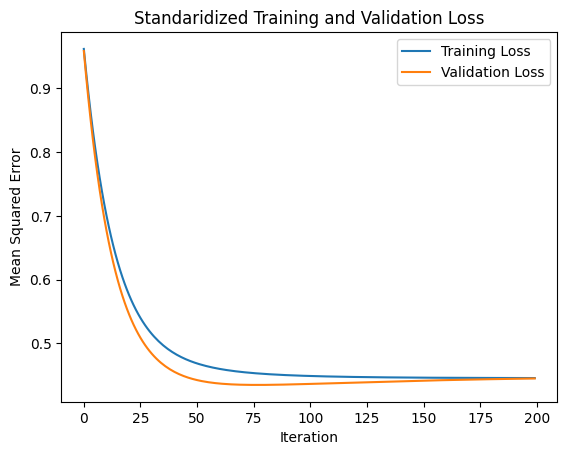

In [769]:
alpha = 0.01
theta = np.zeros(6)
iter = 200
lamda = 10

X_a_train_std = np.c_[np.ones((len(X_train_std), 1)), X_train_std]
X_a_valid_std = np.c_[np.ones((len(X_valid_std), 1)), X_valid_std]

train_loss, valid_loss = grad_des_a(X_a_train_std, price_train_std, X_a_valid_std, price_valid_std, theta, alpha, iter, lamda)

plt.plot(train_loss, label="Training Loss")
plt.plot(valid_loss, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Standaridized Training and Validation Loss")
plt.show()

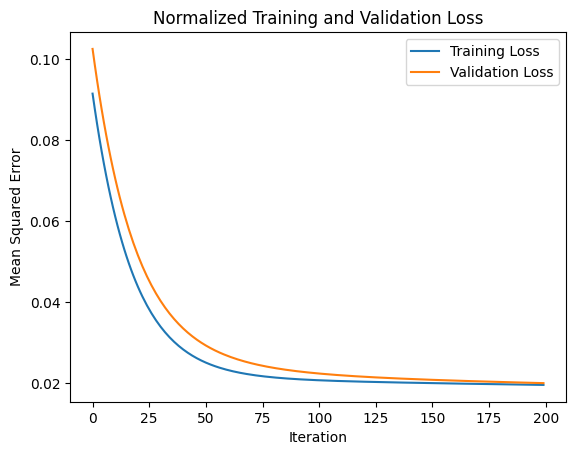

In [770]:
alpha = 0.01
theta = np.zeros(6)
iter = 200
lamda = 15

X_a_train_nom = np.c_[np.ones((len(X_train_nom), 1)), X_train_nom]
X_a_valid_nom = np.c_[np.ones((len(X_valid_nom), 1)), X_valid_nom]

train_loss, valid_loss = grad_des_a(X_a_train_nom, price_train_nom, X_a_valid_nom, price_valid_nom, theta, alpha, iter, lamda)

plt.plot(train_loss, label="Training Loss")
plt.plot(valid_loss, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Normalized Training and Validation Loss")
plt.show()

In [771]:
train_nom, valid_nom = train_test_split(housing1, train_size = 0.8, test_size = 0.2, random_state = 100)

scaler = MinMaxScaler()

train_nom[varlist1] = scaler.fit_transform(train_nom[varlist1])
train_nom.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
22,0.596970,0.432609,0.4,0.000000,0.000000,1.0,1.0,1.0,0.0,1.0,0.333333,0.0
41,0.527273,0.314954,0.4,0.333333,1.000000,1.0,0.0,0.0,0.0,1.0,0.000000,1.0
91,0.404242,0.342105,0.2,0.000000,0.000000,1.0,1.0,1.0,0.0,0.0,0.666667,1.0
118,0.363636,0.319131,0.4,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,0.000000,1.0
472,0.109091,0.124896,0.6,0.000000,0.333333,1.0,0.0,0.0,0.0,0.0,1.000000,0.0


In [772]:
price_train_nom = train_nom.pop('price')
X_train_nom = train_nom
X_train_nom.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
22,0.432609,0.4,0.000000,0.000000,1.0,1.0,1.0,0.0,1.0,0.333333,0.0
41,0.314954,0.4,0.333333,1.000000,1.0,0.0,0.0,0.0,1.0,0.000000,1.0
91,0.342105,0.2,0.000000,0.000000,1.0,1.0,1.0,0.0,0.0,0.666667,1.0
118,0.319131,0.4,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,0.000000,1.0
472,0.124896,0.6,0.000000,0.333333,1.0,0.0,0.0,0.0,0.0,1.000000,0.0


In [773]:
valid_nom[varlist1] = scaler.fit_transform(valid_nom[varlist1])
valid_nom.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
265,0.248485,0.088172,0.333333,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,1.0
54,0.531987,0.311828,0.333333,0.5,0.333333,1.0,1.0,0.0,0.0,1.0,0.333333,0.0
171,0.329966,0.617849,0.333333,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.333333,1.0
244,0.262626,0.263082,0.333333,0.0,0.333333,1.0,1.0,1.0,0.0,0.0,0.000000,1.0
268,0.246465,0.236559,0.666667,0.0,0.333333,1.0,0.0,0.0,0.0,1.0,0.000000,0.0


In [774]:
price_valid_nom = valid_nom.pop('price')
X_valid_nom = valid_nom
X_valid_nom.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
265,0.088172,0.333333,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,1.0
54,0.311828,0.333333,0.5,0.333333,1.0,1.0,0.0,0.0,1.0,0.333333,0.0
171,0.617849,0.333333,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.333333,1.0
244,0.263082,0.333333,0.0,0.333333,1.0,1.0,1.0,0.0,0.0,0.000000,1.0
268,0.236559,0.666667,0.0,0.333333,1.0,0.0,0.0,0.0,1.0,0.000000,0.0


In [775]:
train_std, valid_std = train_test_split(housing1, train_size = 0.8, test_size = 0.2, random_state = 100)

scaler = StandardScaler()

train_std[varlist1] = scaler.fit_transform(train_std[varlist1])
train_std.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
22,2.063847,1.351873,0.078679,-0.579897,-0.929023,0.399468,2.193931,1.353207,-0.241355,1.525859,0.311484,-0.549083
41,1.632233,0.565326,0.078679,1.410929,2.474792,0.399468,-0.455803,-0.738985,-0.241355,1.525859,-0.849261,1.821217
91,0.870342,0.746837,-1.293483,-0.579897,-0.929023,0.399468,2.193931,1.353207,-0.241355,-0.655369,1.472229,1.821217
118,0.618880,0.593251,0.078679,-0.579897,-0.929023,0.399468,-0.455803,1.353207,-0.241355,1.525859,-0.849261,1.821217
472,-0.957447,-0.705249,1.450841,-0.579897,0.205582,0.399468,-0.455803,-0.738985,-0.241355,-0.655369,2.632974,-0.549083


In [776]:
price_train_std = train_std.pop('price')
X_train_std = train_std
X_train_std.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
22,1.351873,0.078679,-0.579897,-0.929023,0.399468,2.193931,1.353207,-0.241355,1.525859,0.311484,-0.549083
41,0.565326,0.078679,1.410929,2.474792,0.399468,-0.455803,-0.738985,-0.241355,1.525859,-0.849261,1.821217
91,0.746837,-1.293483,-0.579897,-0.929023,0.399468,2.193931,1.353207,-0.241355,-0.655369,1.472229,1.821217
118,0.593251,0.078679,-0.579897,-0.929023,0.399468,-0.455803,1.353207,-0.241355,1.525859,-0.849261,1.821217
472,-0.705249,1.450841,-0.579897,0.205582,0.399468,-0.455803,-0.738985,-0.241355,-0.655369,2.632974,-0.549083


In [777]:
valid_std[varlist1] = scaler.fit_transform(valid_std[varlist1])
valid_std.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
265,-0.131863,-1.020953,-0.072023,-0.531775,0.308415,0.429863,-0.502865,-0.716860,-0.096225,-0.776493,-0.643743,1.742710
54,1.436782,0.369177,-0.072023,1.466964,0.308415,0.429863,1.988604,-0.716860,-0.096225,1.287842,0.545545,-0.573819
171,0.318983,2.271249,-0.072023,-0.531775,-0.936669,0.429863,-0.502865,-0.716860,-0.096225,-0.776493,0.545545,1.742710
244,-0.053617,0.066200,-0.072023,-0.531775,0.308415,0.429863,1.988604,1.394972,-0.096225,-0.776493,-0.643743,1.742710
268,-0.143041,-0.098656,1.236396,-0.531775,0.308415,0.429863,-0.502865,-0.716860,-0.096225,1.287842,-0.643743,-0.573819


In [778]:
price_valid_std = valid_std.pop('price')
X_valid_std = valid_std
X_valid_std.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
265,-1.020953,-0.072023,-0.531775,0.308415,0.429863,-0.502865,-0.716860,-0.096225,-0.776493,-0.643743,1.742710
54,0.369177,-0.072023,1.466964,0.308415,0.429863,1.988604,-0.716860,-0.096225,1.287842,0.545545,-0.573819
171,2.271249,-0.072023,-0.531775,-0.936669,0.429863,-0.502865,-0.716860,-0.096225,-0.776493,0.545545,1.742710
244,0.066200,-0.072023,-0.531775,0.308415,0.429863,1.988604,1.394972,-0.096225,-0.776493,-0.643743,1.742710
268,-0.098656,1.236396,-0.531775,0.308415,0.429863,-0.502865,-0.716860,-0.096225,1.287842,-0.643743,-0.573819


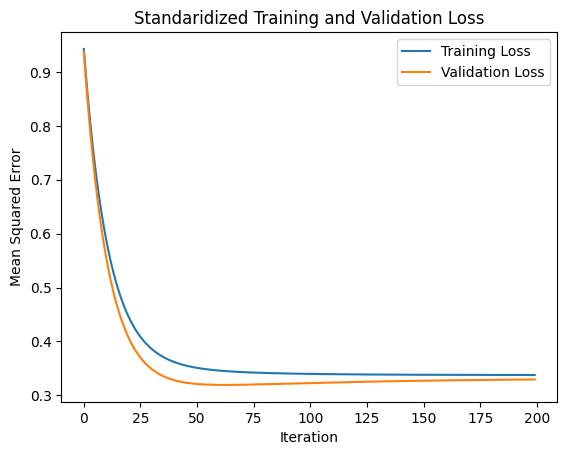

In [779]:
alpha = 0.01
theta = np.zeros(12)
iter = 200
lamda = 10

X_a_train_std = np.c_[np.ones((len(X_train_std), 1)), X_train_std]
X_a_valid_std = np.c_[np.ones((len(X_valid_std), 1)), X_valid_std]

train_loss, valid_loss = grad_des_a(X_a_train_std, price_train_std, X_a_valid_std, price_valid_std, theta, alpha, iter, lamda)

plt.plot(train_loss, label="Training Loss")
plt.plot(valid_loss, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Standaridized Training and Validation Loss")
plt.show()

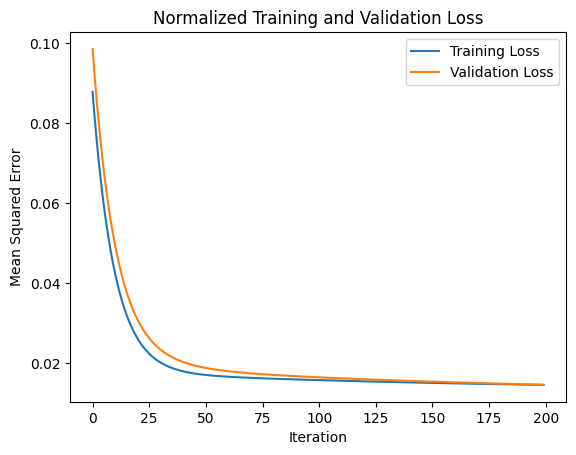

In [780]:
alpha = 0.01
theta = np.zeros(12)
iter = 200
lamda = 15

X_a_train_nom = np.c_[np.ones((len(X_train_nom), 1)), X_train_nom]
X_a_valid_nom = np.c_[np.ones((len(X_valid_nom), 1)), X_valid_nom]

train_loss, valid_loss = grad_des_a(X_a_train_nom, price_train_nom, X_a_valid_nom, price_valid_nom, theta, alpha, iter, lamda)

plt.plot(train_loss, label="Training Loss")
plt.plot(valid_loss, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Normalized Training and Validation Loss")
plt.show()